In [1]:
# Import des librairies principales
import pandas as pd
import numpy as np

# Scikit-learn pour Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Pour sauvegarder le modèle
import joblib

from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

from google.colab import files

# Étape 1 : Upload du fichier depuis mon PC
uploaded = files.upload()

# Étape 2 : Récupérer le nom du fichier uploadé
filename = list(uploaded.keys())[0]
print(f"📂 Fichier uploadé : {filename}")

# Étape 3 : Lire le fichier selon son extension
if filename.endswith(".csv"):
    df = pd.read_csv(filename, encoding="utf-8")
elif filename.endswith(".xlsx") or filename.endswith(".xls"):
    df = pd.read_excel(filename, engine="openpyxl")
else:
    raise ValueError("Format de fichier non supporté. Utilise CSV ou Excel.")



Saving jobs.csv to jobs.csv
📂 Fichier uploadé : jobs.csv


In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   category              200 non-null    object
 1   description           200 non-null    object
 2   education             200 non-null    object
 3   job_market            200 non-null    object
 4   riasec_artistic       200 non-null    int64 
 5   riasec_conventional   200 non-null    int64 
 6   riasec_enterprising   200 non-null    int64 
 7   riasec_investigative  200 non-null    int64 
 8   riasec_realistic      200 non-null    int64 
 9   riasec_social         200 non-null    int64 
 10  salary_range          200 non-null    object
dtypes: int64(6), object(5)
memory usage: 17.3+ KB
None


In [4]:
# Vérifier les valeurs uniques des catégories
print(df['category'].unique())


['IT' 'ENGINEERING' 'EDUCATION' 'ARTS' 'HEALTH' 'BUSINESS']


In [5]:
print(df.describe())

       riasec_artistic  riasec_conventional  riasec_enterprising  \
count       200.000000           200.000000           200.000000   
mean         60.825000            59.990000            62.220000   
std          23.850337            23.023909            23.555379   
min          20.000000            20.000000            21.000000   
25%          40.000000            40.000000            45.000000   
50%          61.500000            63.000000            61.500000   
75%          81.000000            79.000000            84.000000   
max         100.000000           100.000000           100.000000   

       riasec_investigative  riasec_realistic  riasec_social  
count            200.000000         200.00000     200.000000  
mean              60.625000          58.69000      59.190000  
std               23.064131          23.17302      23.844216  
min               20.000000          20.00000      20.000000  
25%               41.000000          38.75000      38.000000  
50%      

In [6]:
# Moyenne des scores RIASEC par catégorie :

riasec_cols = ['riasec_artistic', 'riasec_conventional', 'riasec_enterprising',
               'riasec_investigative', 'riasec_realistic', 'riasec_social']

print(df.groupby("category")[riasec_cols].mean())


             riasec_artistic  riasec_conventional  riasec_enterprising  \
category                                                                 
ARTS               56.441176            62.088235            58.794118   
BUSINESS           56.107143            68.321429            56.928571   
EDUCATION          62.758621            49.310345            64.517241   
ENGINEERING        59.131579            61.342105            66.368421   
HEALTH             64.897436            57.051282            62.205128   
IT                 64.906250            62.125000            63.500000   

             riasec_investigative  riasec_realistic  riasec_social  
category                                                            
ARTS                    62.235294         51.588235      57.500000  
BUSINESS                53.035714         60.928571      62.857143  
EDUCATION               62.758621         61.413793      65.482759  
ENGINEERING             59.315789         60.157895      55.65

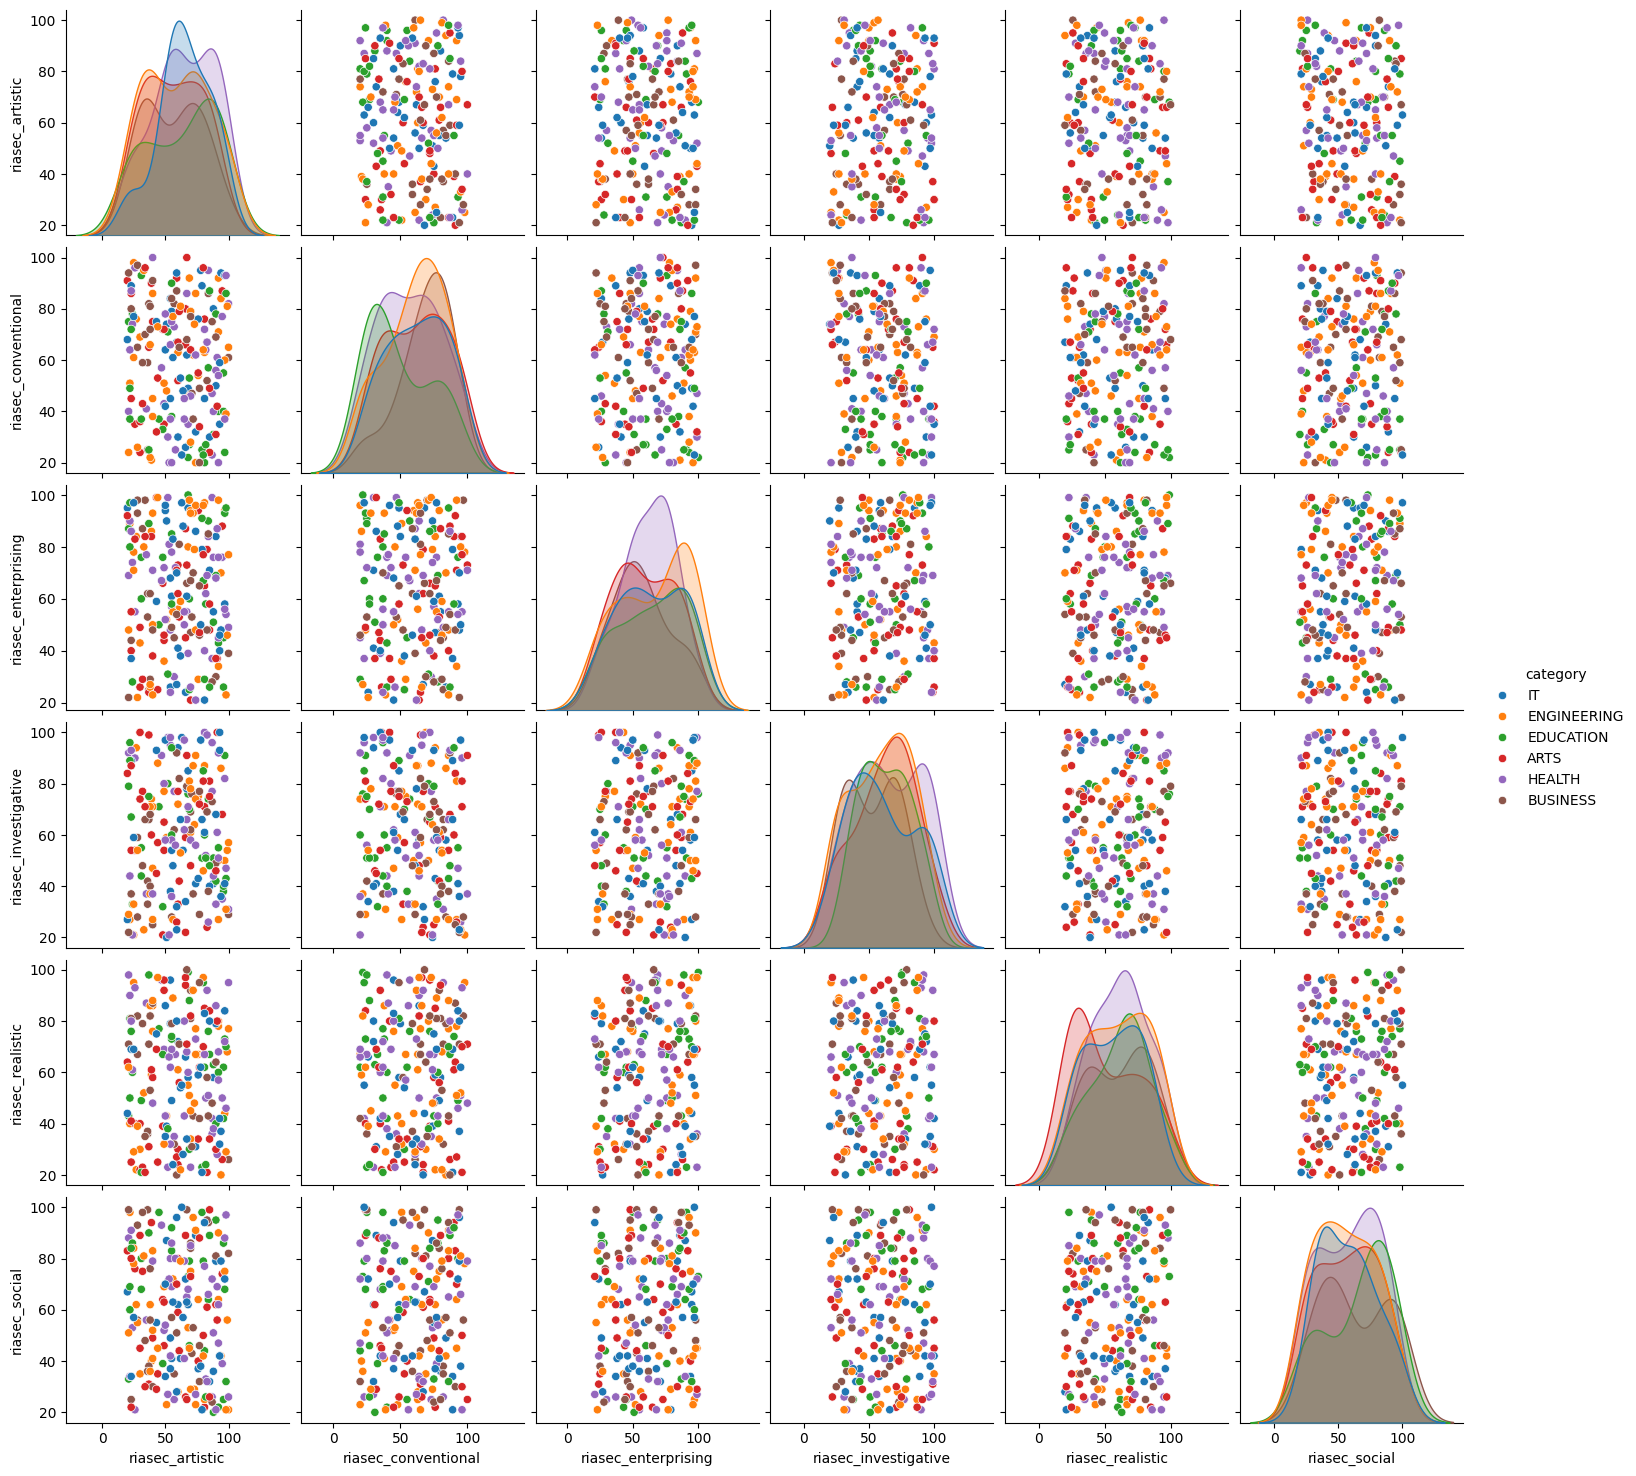

In [7]:
# visualisation exploratoire (EDA)

sns.pairplot(
    df,
    vars=["riasec_artistic","riasec_conventional","riasec_enterprising",
          "riasec_investigative","riasec_realistic","riasec_social"],
    hue="category",
    palette="tab10"
)
plt.show()


Preprocessing



In [8]:
# Vérifier s’il y a des valeurs manquantes ou des doublons
print("Valeurs manquantes :\n", df.isnull().sum())
print("Doublons :", df.duplicated().sum())


Valeurs manquantes :
 category                0
description             0
education               0
job_market              0
riasec_artistic         0
riasec_conventional     0
riasec_enterprising     0
riasec_investigative    0
riasec_realistic        0
riasec_social           0
salary_range            0
dtype: int64
Doublons : 0


In [9]:
# Définir les Features (X) et la Target (y)
# Features = colonnes RIASEC (les variables d'entrée pour le modèle)
X = df[["riasec_artistic","riasec_conventional","riasec_enterprising",
        "riasec_investigative","riasec_realistic","riasec_social"]]

# Target = category (le nom du métier)
y = df["category"]

print("X shape:", X.shape)
print("y shape:", y.shape)

# On dit à l’IA → « avec ces 6 scores RIASEC, trouve quel métier correspond ».


X shape: (200, 6)
y shape: (200,)


In [10]:
#  Encoder la cible (y)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print("Classes encodées :", encoder.classes_)
print("y encodé exemple :", y_encoded[:10])

Classes encodées : ['ARTS' 'BUSINESS' 'EDUCATION' 'ENGINEERING' 'HEALTH' 'IT']
y encodé exemple : [5 3 5 2 0 5 2 5 2 3]


In [11]:
# Séparer données en train et test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_encoded

)

print("Taille du train :", X_train.shape, y_train.shape)
print("Taille du test  :", X_test.shape, y_test.shape)


Taille du train : (160, 6) (160,)
Taille du test  : (40, 6) (40,)


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


On met toutes les colonnes RIASEC sur la même échelle (important pour Logistic Regression).

Regression logistic : BASELINE  

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [14]:
y_pred = model.predict(X_test_scaled)


On demande au modèle de prédire les métiers pour les 20% de données jamais vues (test).

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


print("✅ Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy : 0.125

Classification report:
               precision    recall  f1-score   support

        ARTS       0.00      0.00      0.00         7
    BUSINESS       0.00      0.00      0.00         5
   EDUCATION       0.17      0.17      0.17         6
 ENGINEERING       0.00      0.00      0.00         8
      HEALTH       0.23      0.38      0.29         8
          IT       0.20      0.17      0.18         6

    accuracy                           0.12        40
   macro avg       0.10      0.12      0.11        40
weighted avg       0.10      0.12      0.11        40


Confusion matrix:
 [[0 1 1 3 0 2]
 [0 0 0 2 3 0]
 [1 0 1 0 4 0]
 [1 3 0 0 3 1]
 [1 1 2 0 3 1]
 [1 0 2 2 0 1]]


In [16]:
student_profile = np.array([[10, 20, 30, 15, 100, 25]])
# Pré-traitement (scaler.transform)
student_profile_scaled = scaler.transform(student_profile)
# Prédiction (model.predict)
predicted_job = model.predict(student_profile_scaled)[0]
print("Métier recommandé :", predicted_job)


Métier recommandé : BUSINESS


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
probas = model.predict_proba(student_profile_scaled)
print("Probabilités par métier :", probas)


Probabilités par métier : [[0.1682323  0.31398111 0.19948034 0.1370567  0.12411201 0.05713753]]


demander au modèle ses probabilités complètes.

Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier


In [19]:
rf_model = RandomForestClassifier(
    n_estimators=200,    # nombre d’arbres (200 arbres pour une bonne stabilité)
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [20]:
y_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy Random Forest :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred, target_names=encoder.classes_))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))


Accuracy Random Forest : 0.15

Classification Report :
               precision    recall  f1-score   support

        ARTS       0.00      0.00      0.00         7
    BUSINESS       0.00      0.00      0.00         5
   EDUCATION       0.38      0.50      0.43         6
 ENGINEERING       0.18      0.25      0.21         8
      HEALTH       0.14      0.12      0.13         8
          IT       0.00      0.00      0.00         6

    accuracy                           0.15        40
   macro avg       0.12      0.15      0.13        40
weighted avg       0.12      0.15      0.13        40


Confusion Matrix :
 [[0 1 1 4 1 0]
 [1 0 1 2 0 1]
 [0 0 3 0 2 1]
 [1 3 0 2 1 1]
 [0 1 2 2 1 2]
 [2 0 1 1 2 0]]


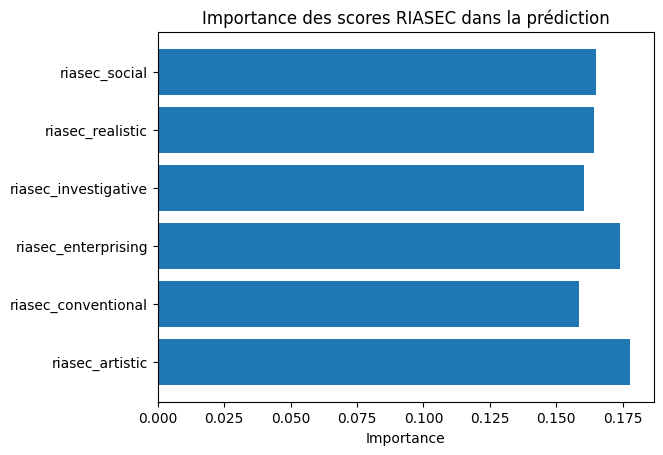

In [21]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Importance des scores RIASEC dans la prédiction")
plt.show()


KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier


In [23]:
knn_model = KNeighborsClassifier(
    n_neighbors=5,   # on regarde les 5 voisins les plus proches
    metric='euclidean'  # distance euclidienne (classique)
)

knn_model.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [24]:
y_pred_knn = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy KNN :", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report :\n", classification_report(y_test, y_pred_knn, target_names=encoder.classes_))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred_knn))


Accuracy KNN : 0.225

Classification Report :
               precision    recall  f1-score   support

        ARTS       0.12      0.14      0.13         7
    BUSINESS       0.00      0.00      0.00         5
   EDUCATION       0.50      0.67      0.57         6
 ENGINEERING       0.27      0.38      0.32         8
      HEALTH       0.14      0.12      0.13         8
          IT       0.00      0.00      0.00         6

    accuracy                           0.23        40
   macro avg       0.17      0.22      0.19        40
weighted avg       0.18      0.23      0.20        40


Confusion Matrix :
 [[1 1 1 3 1 0]
 [1 0 0 2 1 1]
 [0 0 4 0 2 0]
 [3 0 0 3 1 1]
 [1 1 2 2 1 1]
 [2 1 1 1 1 0]]


In [25]:
# Exemple étudiant (scores fictifs)
student_profile = np.array([[10, 20, 30, 15, 100, 25]])

# Prédiction avec KNN
predicted_class = knn_model.predict(student_profile)[0]

predicted_job_knn = knn_model.predict(student_profile)[0]
print("Métier recommandé (KNN) :", predicted_job_knn)


Métier recommandé (KNN) : ENGINEERING


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [30]:
models = {
    "Logistic Regression": model,
    "Random Forest": rf_model,
    "KNN": knn_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {acc:.2f}")


Logistic Regression - Accuracy: 0.23
Random Forest - Accuracy: 0.15
KNN - Accuracy: 0.23


SVM

Prendre les scores RIASEC d’un étudiant.

Prédire son métier recommandé.

Associer ce métier à une formation (trainings.csv).

In [31]:
from sklearn.svm import SVC


Créer et entraîner le modèle

In [32]:
svm_model = SVC(
    kernel="linear",        # "linear" = frontière linéaire ; tu peux tester "rbf" aussi
    probability=True,       # pour pouvoir obtenir des probabilités
    random_state=42
)

svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True, random_state=42)

Évaluer SVM

In [33]:
y_pred_svm = svm_model.predict(X_test)

print("✅ Accuracy SVM :", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report :\n", classification_report(y_test, y_pred_svm, target_names=encoder.classes_))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred_svm))


✅ Accuracy SVM : 0.175

Classification Report :
               precision    recall  f1-score   support

        ARTS       0.00      0.00      0.00         7
    BUSINESS       0.00      0.00      0.00         5
   EDUCATION       0.33      0.33      0.33         6
 ENGINEERING       0.14      0.12      0.13         8
      HEALTH       0.20      0.38      0.26         8
          IT       0.17      0.17      0.17         6

    accuracy                           0.17        40
   macro avg       0.14      0.17      0.15        40
weighted avg       0.14      0.17      0.15        40


Confusion Matrix :
 [[0 0 0 2 2 3]
 [0 0 0 2 3 0]
 [1 0 2 0 3 0]
 [0 2 1 1 3 1]
 [1 1 2 0 3 1]
 [0 1 1 2 1 1]]


In [34]:
models = {
    "Logistic Regression": model,
    "Random Forest": rf_model,
    "KNN": knn_model,
    "SVM": svm_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {acc:.2f}")


Logistic Regression - Accuracy: 0.23
Random Forest - Accuracy: 0.15
KNN - Accuracy: 0.23
SVM - Accuracy: 0.17


In [40]:
import os

# Créer le dossier models s'il n'existe pas
os.makedirs("models", exist_ok=True)

# Sauvegarde du meilleur modèle
joblib.dump(best_model, "models/logistic_regression_model.pkl")
joblib.dump(encoder, "models/encoder.pkl")
joblib.dump(scaler, "models/scaler.pkl")


['models/scaler.pkl']